# Installing libraries for working with consumer excel dataset  

In [ ]:
!pip install openpyxl
!pip install fancyimpute
!pip install missingno


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.5 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=4258971f7e1943f950ac86c464768395dc3174d1078781cc3fb1e66d8fd63413
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=b5daf5cd7e99869bf36e2296ac671a8a1eb898c0983ceac20c4f29b6f23b8fb5
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.d

 # Import essential libaries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# load and read the excel dataset

In [ ]:
description = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
dataset = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


# Showing the different rows and colum of dataset

In [ ]:
dataset.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


# Shape of the dataset 

In [ ]:
print(dataset.shape)

(5630, 20)


# Preview the information of the dataset  

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# Checking for null values

In [ ]:
dataset.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
dataset.fillna(0)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,0.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,0.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,0.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,0.0,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
11,50012,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
12,50013,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,55625,0,1.0,Mobile Phone,3,12.0,UPI,Female,2.0,5,Mobile Phone,3,Single,2,0,19.0,2.0,2.0,1.0,154.66
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


# Descriptive summary and details of the each colum of dataset 

In [ ]:
dataset.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3774.000000,3774.000000,3774.000000,3774,3774.000000,3774.000000,3774,3774,3774.000000,3774.000000,3774,3774.000000,3774,3774.000000,3774.000000,3774.00000,3774.000000,3774.000000,3774.000000,3774.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1936,NaN,NaN,1538,2271,NaN,NaN,1961,NaN,1982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,53017.994966,0.167197,8.776895,NaN,1.707737,15.743773,NaN,NaN,2.981187,3.754107,NaN,3.056439,NaN,4.216481,0.282194,15.72761,1.719661,2.825384,4.526232,164.213590
std,1608.979289,0.373201,7.678508,NaN,0.936725,8.594330,NaN,NaN,0.722158,1.025233,NaN,1.389730,NaN,2.562142,0.450127,3.62991,1.674508,2.467597,3.371310,24.093966
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.00000,0.000000,1.000000,0.000000,0.000000
25%,51656.250000,0.000000,1.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.00000,1.000000,1.000000,2.000000,148.485000
50%,53160.500000,0.000000,8.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.00000,1.000000,2.000000,3.000000,160.050000
75%,54394.500000,0.000000,13.000000,NaN,3.000000,21.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.00000,2.000000,3.000000,7.000000,178.010000


# Ploting number of customers in the churn and not churn class

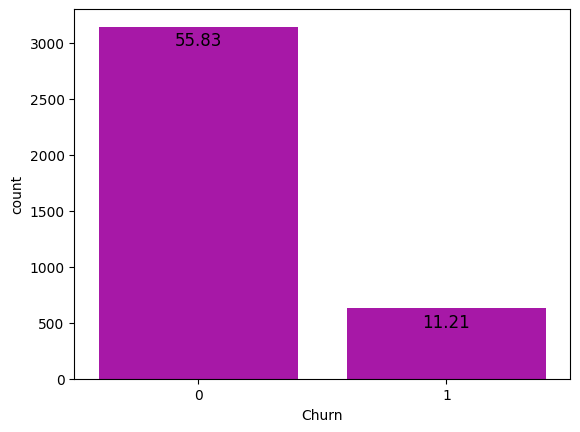

In [ ]:
ax = sns.countplot(x='Churn', data=dataset, color='m')
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100,'.2f'), 
                (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')

plt.show()

# # Distribution plot based on tenure of the customers on different platform

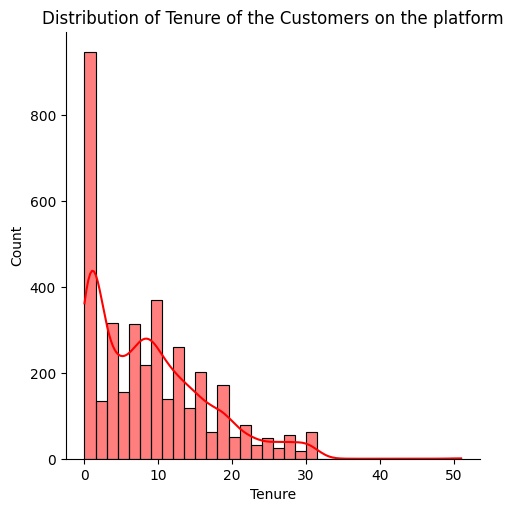

In [ ]:
sns.displot(x='Tenure', kde=True, data=dataset, color='r')
plt.title("Distribution of Tenure of the Customers on the platform")
plt.show()

# Distribution plot based on customer orders 

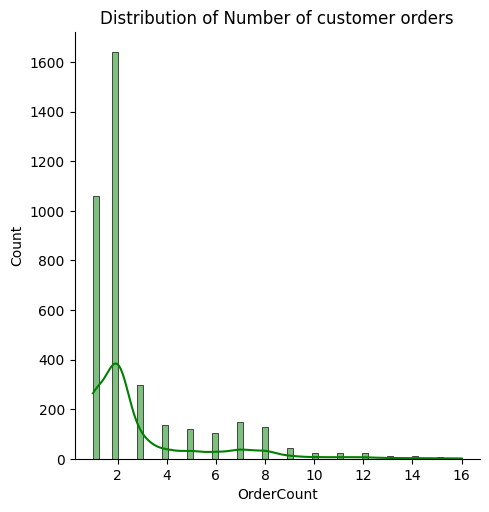

In [ ]:
sns.displot(x='OrderCount', kde=True, data=dataset, color='g')
plt.title("Distribution of Number of customer orders")
plt.show()

# Distribution plot based on last orders count of the customers 

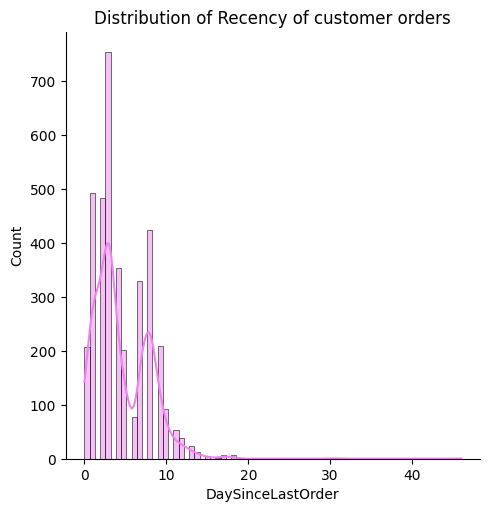

In [ ]:
sns.displot(x='DaySinceLastOrder', kde=True, data=dataset, color='violet')
plt.title("Distribution of Recency of customer orders")
plt.show()

 # Distribution ploting count of the Cashback amount 

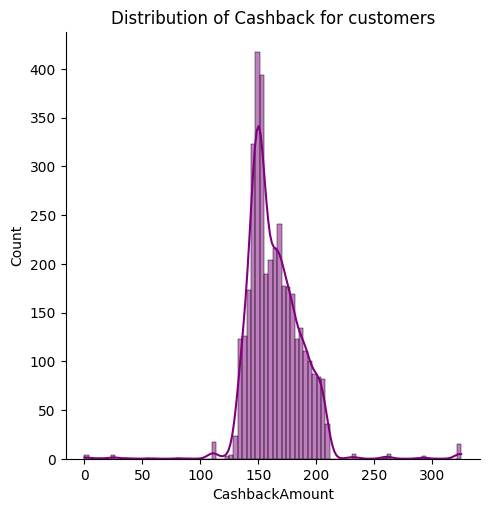

In [ ]:
sns.displot(x='CashbackAmount',kde=True, data=dataset, color='purple')
plt.title('Distribution of Cashback for customers')
plt.show()

# Distribution plot based on distance between warehouse to customers home   

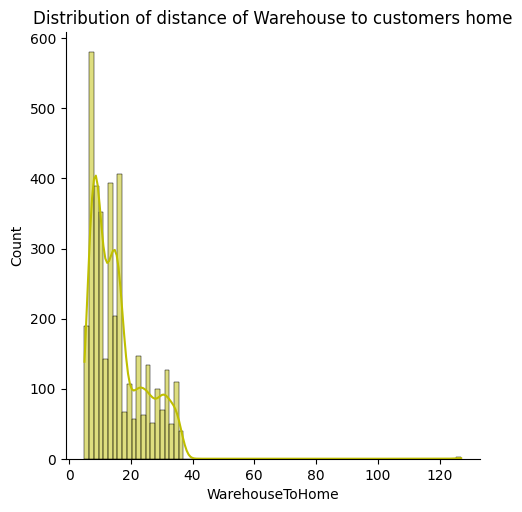

In [ ]:
sns.displot(x='WarehouseToHome', kde=True, data=dataset, color='y')
plt.title("Distribution of distance of Warehouse to customers home")
plt.show()

# Increase percentage of the cutomer orders 

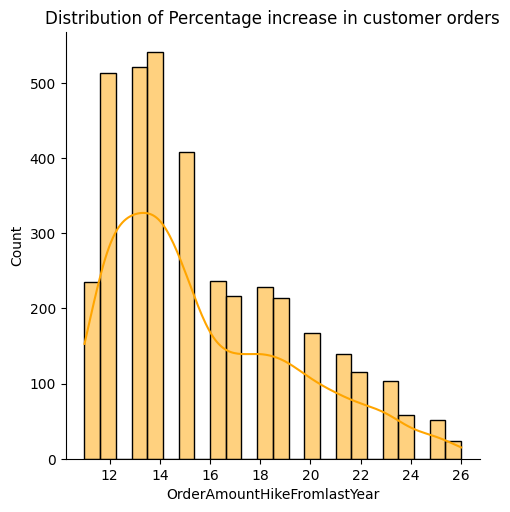

In [ ]:
sns.displot(x='OrderAmountHikeFromlastYear', kde=True, data=dataset, color='orange')
plt.title("Distribution of Percentage increase in customer orders")
plt.show()

# Online purchasing behaviours of the customers based on time spent on the app by the customers 

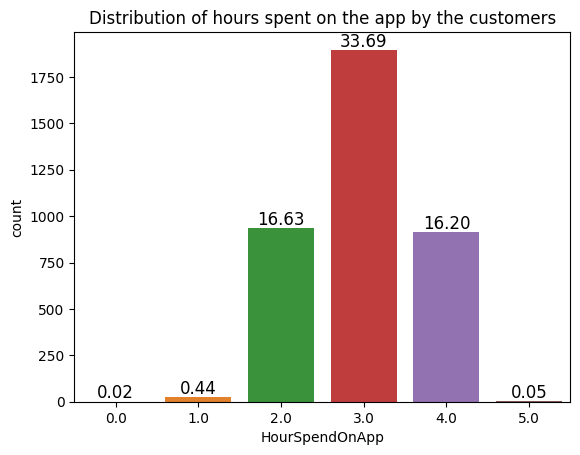

In [ ]:
axx = sns.countplot(x='HourSpendOnApp', data=dataset)
for a in axx.patches:
    axx.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Distribution of hours spent on the app by the customers")
plt.show()


# correlational analysis

<Axes: >

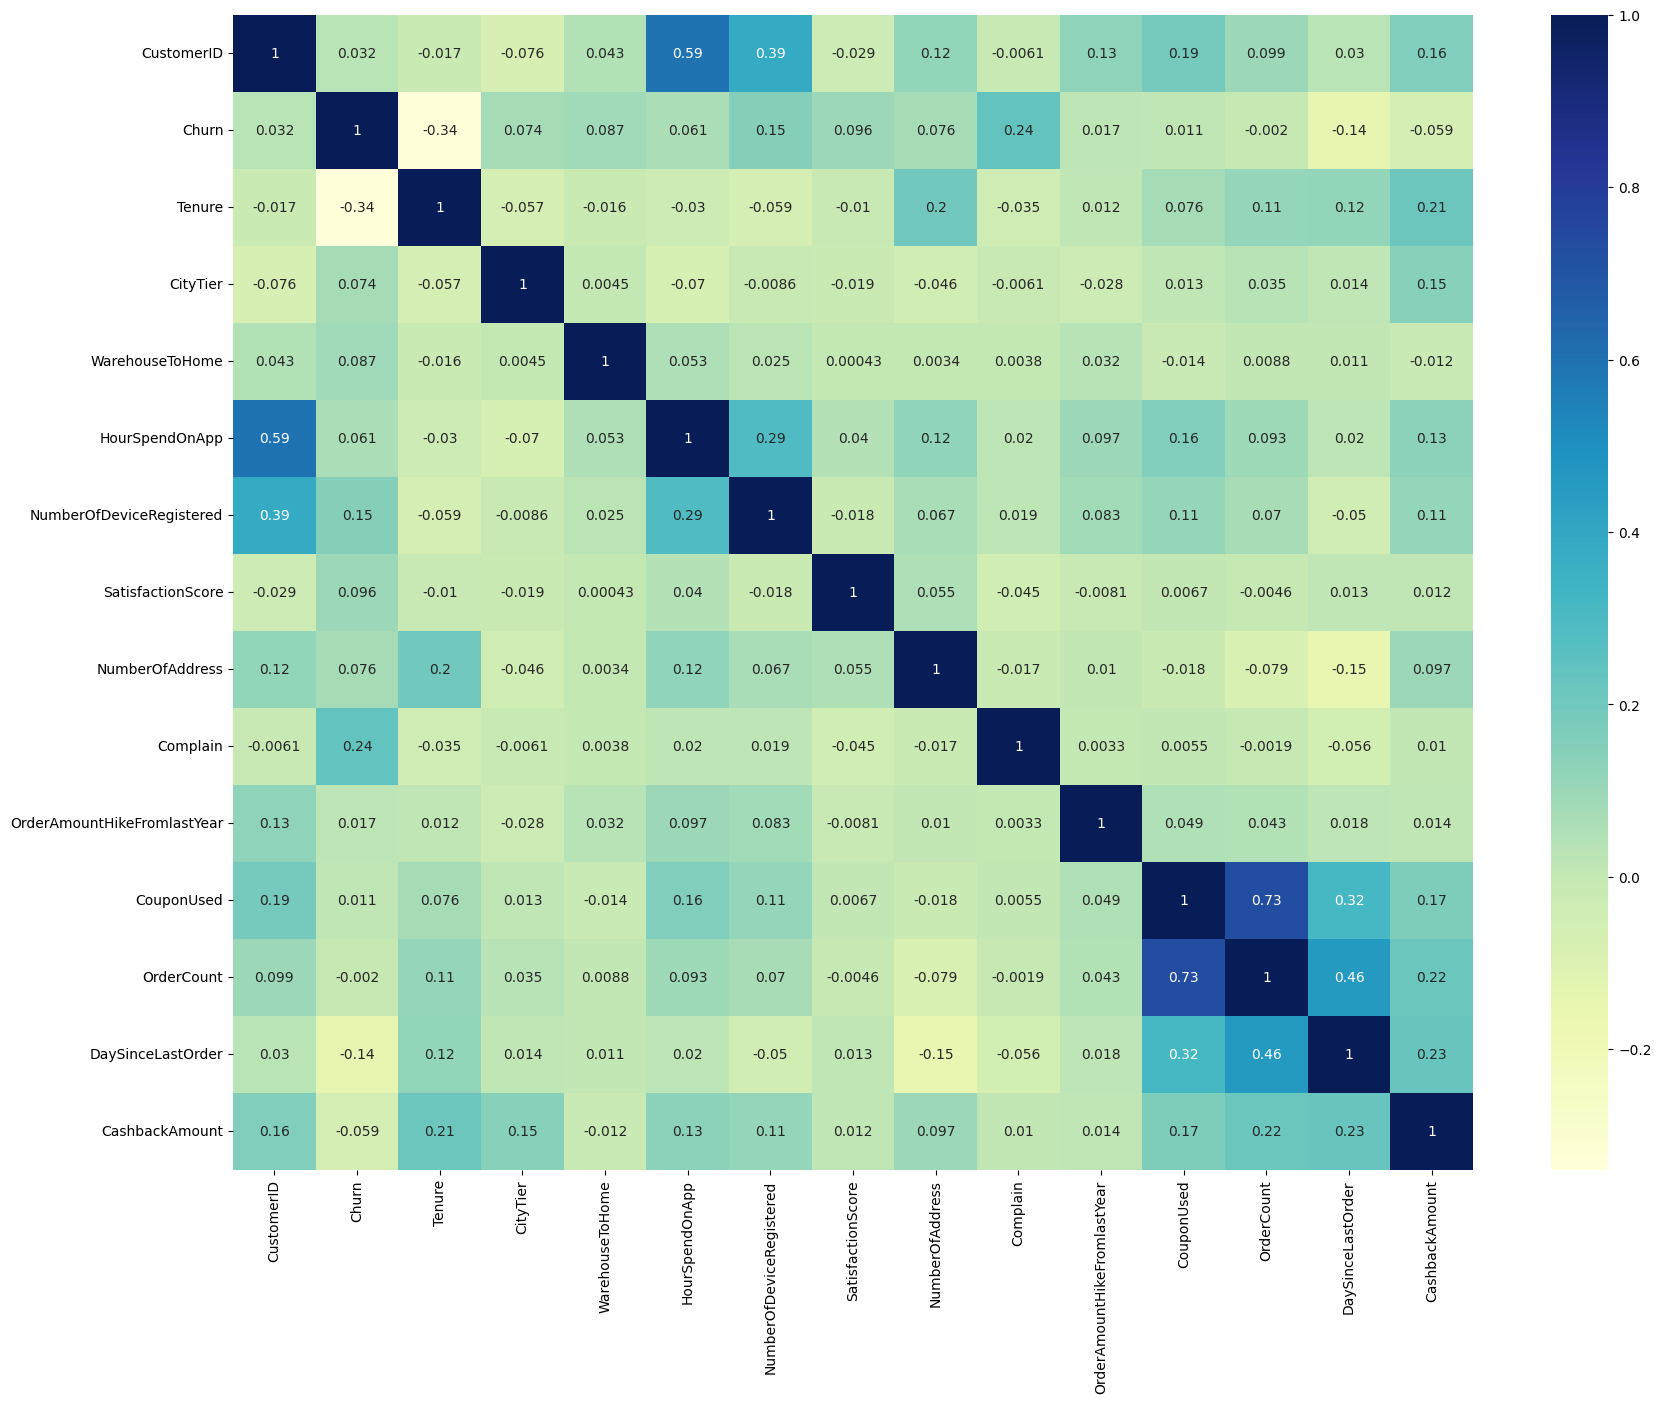

In [ ]:
plt.figure(figsize=[20,15])
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")

# Mentioning the important columns

In [ ]:
dataset[['MaritalStatus', 'PreferedOrderCat', 'Gender','PreferredPaymentMode', 'PreferredLoginDevice']] = dataset[['MaritalStatus', 'PreferedOrderCat', 'Gender','PreferredPaymentMode', 'PreferredLoginDevice']].apply(lambda col:pd.Categorical(col).codes)

In [ ]:
dataset['Tenure'] = dataset['Tenure'].astype(int)
dataset['WarehouseToHome'] = dataset['WarehouseToHome'].astype(int)
dataset['HourSpendOnApp'] = dataset['WarehouseToHome'].astype(int)
dataset['OrderAmountHikeFromlastYear'] = dataset['OrderAmountHikeFromlastYear'].astype(int)
dataset['CouponUsed'] = dataset['CouponUsed'].astype(int)
dataset['OrderCount'] = dataset['OrderCount'].astype(int)
dataset['DaySinceLastOrder'] = dataset['DaySinceLastOrder'].astype(int)
dataset['CashbackAmount'] = dataset['CashbackAmount'].astype(int)

# Data split

In [ ]:
from sklearn.model_selection import train_test_split
X = dataset .drop(['Churn', 'NumberOfDeviceRegistered','CouponUsed','OrderCount','PreferredPaymentMode','NumberOfAddress', 'CustomerID'],axis=1) 
y = dataset['Churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implementation of the Decision tree classifier

In [ ]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_r2_score = r2_score(y_test, dt_pred)
print(f'Decision Tree R2 Score: {dt_r2_score}')

Decision Tree R2 Score: 0.7386638975424022


# Implementation of the Random Forest Regression model

In [ ]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_r2_score = r2_score(y_test, rf_pred)
print(f'Random Forest R2 Score: {rf_r2_score}')

Random Forest R2 Score: 0.7611986918772354


# Implementation of the Linear Regression model 

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_r2_score = r2_score(y_test, lr_pred)
print(f'Linear Regression R2 Score: {lr_r2_score}')

Linear Regression R2 Score: 0.18931084795251474


# Comparison of Deployed models

In [ ]:
models = pd.DataFrame({
    'Model': ['DecisionTree', 'RandomForest', 'LinearRegression'],
    'r2_score': [dt_r2_score*100, rf_r2_score*100, lr_r2_score*100]})
models.sort_values(by='r2_score', ascending=False)

,Model,r2_score
1,RandomForest,76.119869
0,DecisionTree,73.866390
2,LinearRegression,18.931085


In [ ]:
dataset.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,1,3,6,4,0,6,3,2,2,2,9,1,11,1,1,5,159
3,50004,1,0,2,3,15,4,1,15,4,2,5,2,8,0,23,0,1,3,134
5,50006,1,0,0,1,22,4,0,22,5,4,5,2,2,1,22,4,6,7,139
11,50012,1,11,1,1,6,4,1,6,4,0,3,2,10,1,13,0,1,0,153
12,50013,1,0,2,1,11,1,1,11,3,3,3,2,2,1,13,2,2,2,134


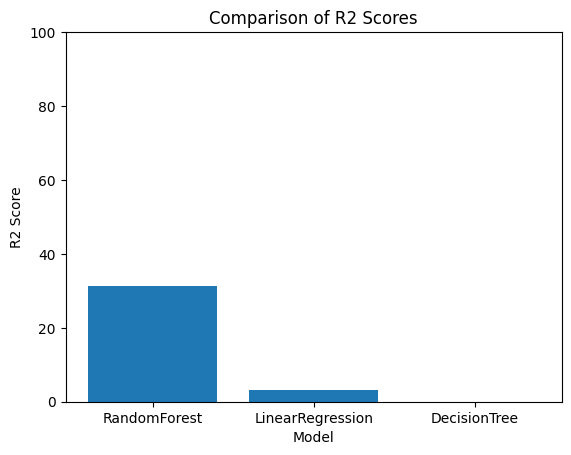

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



# split the data into training and testing sets
X = dataset.drop('OrderAmountHikeFromlastYear', axis=1)
y = dataset['OrderAmountHikeFromlastYear']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_r2_score = r2_score(y_test, dt_pred)

# create and fit the random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_r2_score = r2_score(y_test, rf_pred)

# create and fit the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_r2_score = r2_score(y_test, lr_pred)

# create a DataFrame to store the R2 scores of the models
models = pd.DataFrame({
    'Model': ['DecisionTree', 'RandomForest', 'LinearRegression'],
    'r2_score': [dt_r2_score*100, rf_r2_score*100, lr_r2_score*100]
})

# sort the models by their R2 scores in descending order
models = models.sort_values(by='r2_score', ascending=False)

# plot the R2 scores of the models
plt.bar(models['Model'], models['r2_score'])
plt.ylim([0, 100])
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.title('Comparison of R2 Scores')
plt.show()


# Growth Visualisation

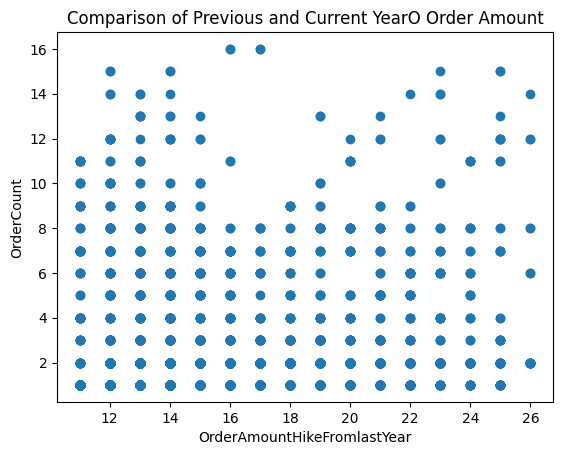

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# extract two columns to compare
x = dataset['OrderAmountHikeFromlastYear']
y = dataset['OrderCount']

# create a scatter plot
plt.scatter(x, y)
plt.xlabel('OrderAmountHikeFromlastYear')
plt.ylabel('OrderCount')
plt.title('Comparison of Previous and Current YearO Order Amount')
plt.show()


# Growth Perccentage

In [ ]:
import pandas as pd
# calculate growth percentage
this_year=dataset['OrderAmountHikeFromlastYear'].sum()
prvs_year=dataset['OrderCount'].sum()
cal= (this_year-prvs_year)/prvs_year * 100
print (f'Growth Percentage: \n{cal}%')


Growth Percentage: 
456.6538497608553%


In [ ]:
import pandas as pd


# calculate growth percentage
growth_percent = ((dataset['OrderAmountHikeFromlastYear'] - dataset['OrderCount']) / dataset['OrderCount']) * 100

# add growth percentage as a new column
dataset['Growth'] = growth_percent

# display the data with growth percentage
print(dataset.head())


    CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  \
0        50001      1       4                     1         3   
3        50004      1       0                     2         3   
5        50006      1       0                     0         1   
11       50012      1      11                     1         1   
12       50013      1       0                     2         1   

    WarehouseToHome  PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 6                     4       0               6   
3                15                     4       1              15   
5                22                     4       0              22   
11                6                     4       1               6   
12               11                     1       1              11   

    NumberOfDeviceRegistered  ...  SatisfactionScore  MaritalStatus  \
0                          3  ...                  2              2   
3                          4  ...                  5

In [ ]:
!jupyter nbconvert --to html Growth_rate_and_consumer_acceptance (1)(1).ipynb


/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `jupyter nbconvert --to html Growth_rate_and_consumer_acceptance (1)(1).ipynb'
